In [80]:
from diagrams import Diagram, Cluster
from diagrams.onprem.vcs import Github
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.container import Docker

# Paths to custom icons
langchain_logo = "input_icons/langchain.png"
pinecone_logo = "input_icons/pinecone.png"
docs_logo = "input_icons/docs.png"
bsoup_logo = "input_icons/bs.png"
python_logo = "input_icons/python.png"
openai_logo = "input_icons/OpenAI.png"
data_combine_logo = "input_icons/python.png"
all_other_logo = "input_icons/all_other_files.png"
md_logo = "input_icons/md.png"
ipynb_logo = "input_icons/ipynb.png"
github_actions_logo = "input_icons/github_actions.png"

with Diagram("Backend Airflow Pipeline with LangChain, Pinecone, and GitHub Actions", show=False) as diag:

    # GitHub Actions outside the main cluster
    github_actions = Custom("GitHub Actions\n(CI/CD)", github_actions_logo)

    # Main cluster for backend workflow
    with Cluster("Airflow Orchestrated Workflow"):
        airflow = Airflow("Airflow Orchestrator")

        # Documentation processing
        with Cluster("Documentation Processing"):
            docs = Custom("Documentation Pages", docs_logo)
            langchain = Custom("LangChain\n(Scraping)", langchain_logo)
            bsoup = Custom("Beautiful Soup\n(Parsing)", bsoup_logo)
            python_process_docs = Custom("Python Processing", python_logo)
            docs >> langchain >> bsoup >> python_process_docs

        # GitHub processing
        with Cluster("GitHub Processing"):
            github_repos = Github("GitHub Repositories")
            parse_py = Custom("Parse\n.py Files", python_logo)
            parse_md = Custom("Parse\n.md Files", md_logo)
            parse_ipynb = Custom("Parse\n.ipynb Files", ipynb_logo)
            parse_all_other_files = Custom("Parse\nall other Files", all_other_logo)
            github_combined = Custom("Combine\nGitHub Data", data_combine_logo)
            github_repos >> [parse_py, parse_md, parse_ipynb, parse_all_other_files] >> github_combined

        # Combined processing
        combined_data = Custom("Combine Docs\n& GitHub Data", data_combine_logo)

        # Storage and embeddings
        with Cluster("Storage and Embeddings"):
            structured_content = Snowflake("Snowflake\n(Structured Data)")
            openai_embedding = Custom("OpenAI\nEmbedding", openai_logo)
            pinecone = Custom("Pinecone\nVector Store", pinecone_logo)

        # Combine documentation and GitHub data
        [python_process_docs, github_combined] >> combined_data

        # Combined data to storage and embeddings
        combined_data >> structured_content
        combined_data >> openai_embedding >> pinecone

    docker = Docker("Docker Container")

    # Connect GitHub Actions to the workflow
    github_actions >> airflow

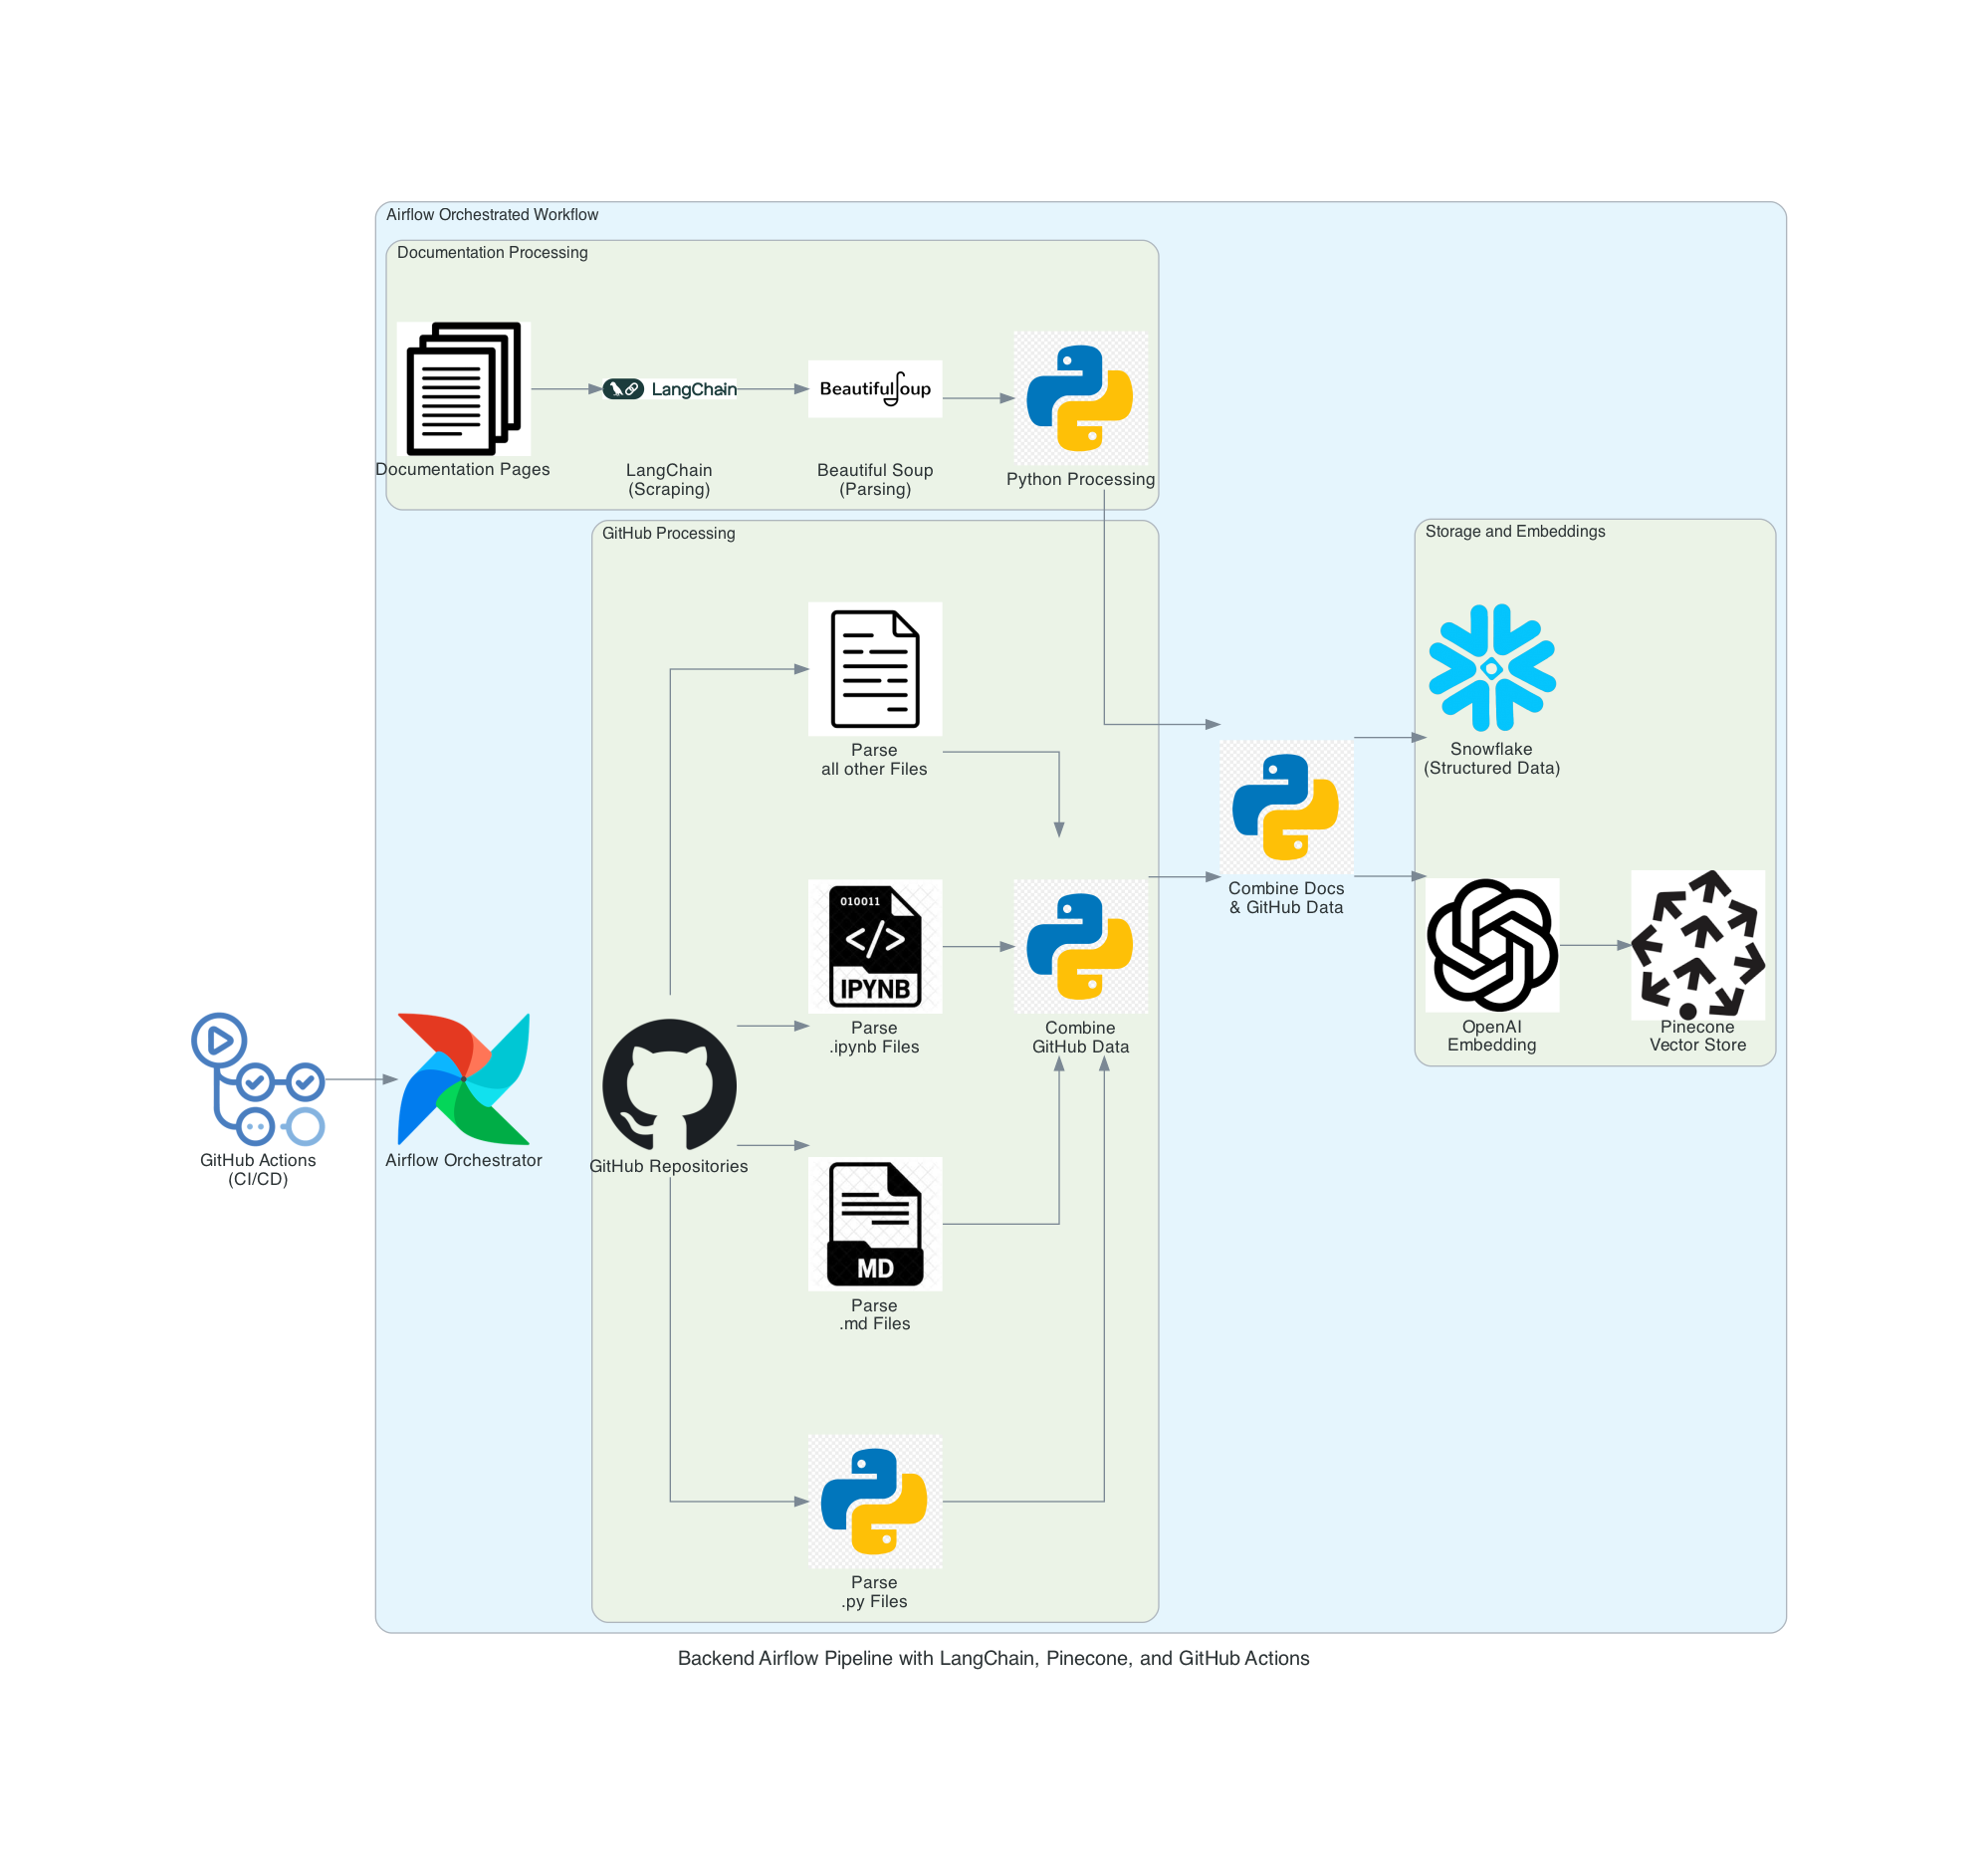

In [78]:
diag

In [98]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import User
from diagrams.programming.framework import FastAPI

# Define the icons for custom nodes
user_icon = "input_icons/user.png" 
streamlit_icon = "input_icons/streamlit.png"  
jwt_icon = "input_icons/jwt.png"  
snowflake_icon = "input_icons/snowflake.png" 
langgraph_icon = "input_icons/langgraph.png"
github_actions_icon = "input_icons/github_actions.png"

with Diagram("User Interaction with FastAPI Endpoints", show=False) as diag:
    # User node (outside the cluster)
    user = Custom("User", user_icon) if user_icon else User("User")

    # GitHub Actions node (outside the cluster)
    github_actions = Custom("GitHub Actions\n(CI/CD)", github_actions_icon)

    # Docker container for backend
    with Cluster("Docker Container"):
        # Streamlit node
        streamlit = Custom("Streamlit", streamlit_icon) if streamlit_icon else Custom("Streamlit", streamlit_icon)

        # FastAPI node
        fastapi = FastAPI("FastAPI Endpoint")

        # FastAPI Endpoint Cluster
        with Cluster("FastAPI Endpoints"):
            snowflake = Custom("Snowflake User Details", snowflake_icon)
            jwt_auth = Custom("JWT Authentication", jwt_icon)
            langgraph_agent_1 = Custom("Code Generation Agent", langgraph_icon)
            langgraph_agent_2 = Custom("SQL Agent", langgraph_icon)
            langgraph_agent_3 = Custom("Web Search Agent", langgraph_icon)

        # Workflow connections within Docker
        streamlit >> fastapi
        fastapi >> Edge(label="Fetch User Details") >> snowflake
        fastapi >> Edge(label="Validate User") >> jwt_auth
        fastapi >> Edge(label="Code Generation") >> langgraph_agent_1
        fastapi >> Edge(label="SQL Queries") >> langgraph_agent_2
        fastapi >> Edge(label="Web Search") >> langgraph_agent_3

    # User connects to Streamlit
    user >> streamlit

    # GitHub Actions connects to Docker
    github_actions >> Edge(label="Build & Deploy") >> streamlit


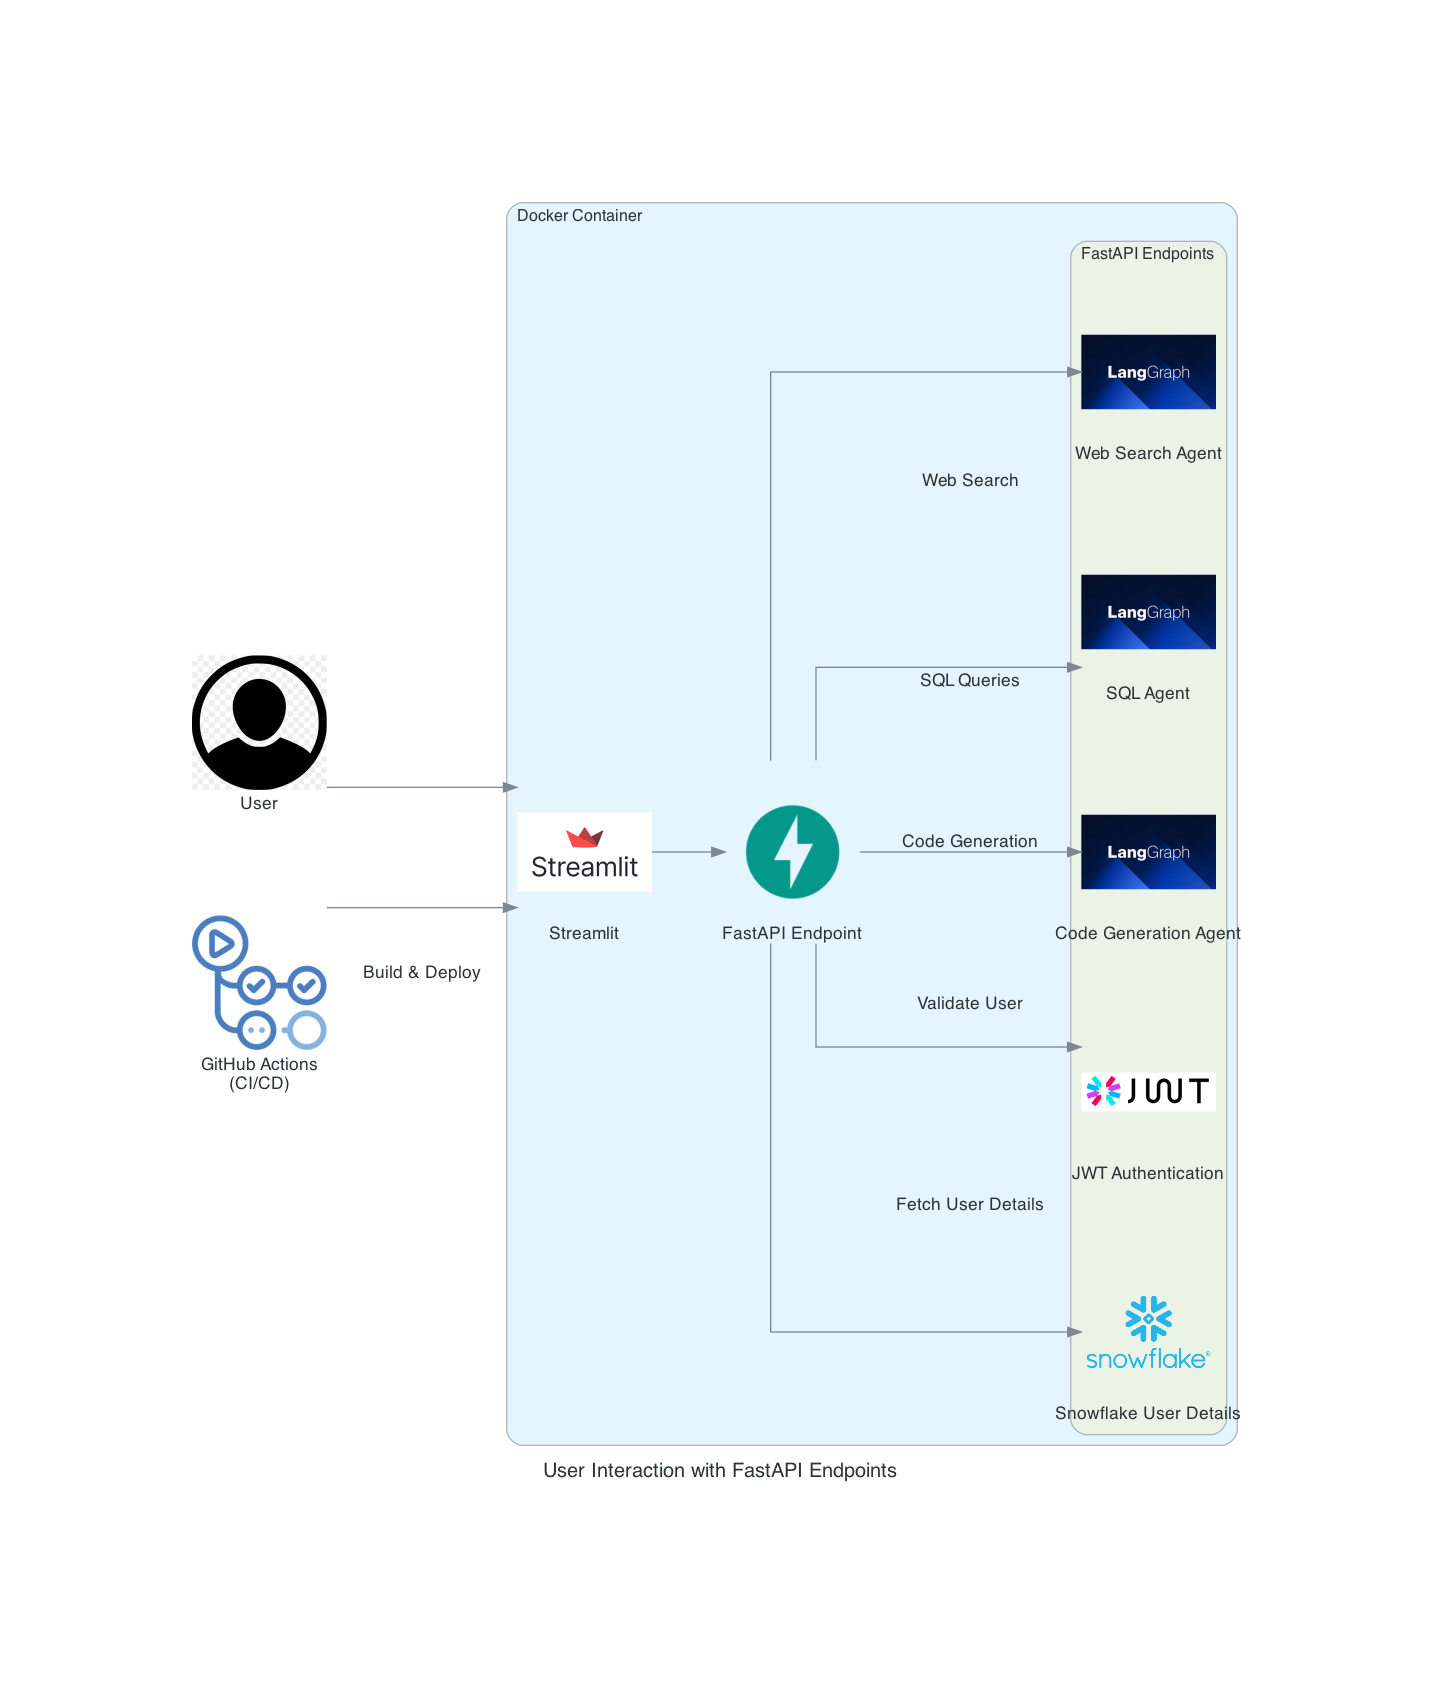

In [100]:
diag